In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

In [23]:
# Read and display image

img = [cv2.imread("C:\MLAI\CNN-from-scratch\chomu.jpg")]

cv2.imshow('',img[0])
cv2.waitKey(0)

-1

In [20]:
len(img)

1

In [24]:
'''
    Stride : Vector
        0: Horizontal (column) stride
        1: Vertical (row) stride
'''

stride1 = [0,0]
stride1[0] = int(input("Enter row stride"))
stride1[1] = int(input("Enter column stride"))


In [44]:
 def convolution(input_img,filter,stride):


    '''

    Parameters: 
        input_img : Original image with RGB channels [H x W x 3]
        filter : Kernel or filter [3x3 / 5x5]
        stride : The no.of pixels to skip with each convolution. Row stride / column stride
    
    Return:
        f_map : Feature map

    Algorithm:

        1. Flatten the image and scale it from 0-255 to 0-1
        2. Calculate the  dimension of output array using cnn formula
        3. Loop to iterate over the image using kernel sized patch.
        4. Inner loop to perform Convolution on Individual patch and filter.
            a. Element-wise multiplication of single pixel in patch with filter pixel.
        5. All the places that contain 0 value indicate perfect match between the patch and the filter.

    
    '''
    if len(input_img[0].shape)>2:

        grimg = np.divide(np.mean(input_img,axis=2),255)
    else:
        grimg = np.divide(input_img,255)
        
    kernel = filter.shape[0]

    n = 0 #row
    o =0

    # Calculating output dimension of convolution opertion
    f_dim = [int(( (grimg.shape[0] - len(filter[0]) ) /stride[0]) +1), int(((grimg.shape[1] -len(filter[1]) ) /stride[1]) +1)]
    f_map = np.empty([f_dim[0],f_dim[1]])

    # To test the dimensions of output
    # print(grimg.shape,f_dim)
    # print(grimg.shape[0],len(filter[0]),stride[1],"second",grimg.shape[1],len(filter[1]),stride[0])
    # print( grimg.shape[0] - len(filter[0]),( (grimg.shape[0] - len(filter[0]) ) /stride[0]))
    # print( grimg.shape[1] -len(filter[1]),(grimg.shape[1] -len(filter[1]) ) /stride[1])

    while n < grimg.shape[0]-(kernel-1) and o<f_map.shape[0]:

        m = 0  #column
        p = 0 


        while m < grimg.shape[1]-(kernel-1) and p<f_map.shape[1]:

            sum = 0

            # Element-wise multiplication of 3x3 matrix with filter

            for i in range(n,n+kernel):
                for j in range(m,m+kernel):

                    try:
                        sum += grimg[i,j] * filter[i-n,j-m]
                    except:
                        #print(m,n,[i,j],grimg.shape,grimg.shape[0])
                        return f_map.shape

            # To handle the index error thrown due to iterator reaching end of column.
            try:
                f_map[o][p] = sum
            except: 

                m += stride[1]
                break

            p += 1
            m += stride[1]

        o += 1
        n += stride[0]

    return f_map
    

In [5]:
def init_filters(dim_of_filter,output_channels,cust_cnn = False):

    '''
    Generate filters

    Parameters:

        dim_of_filter  : Kernel size
        output_channels : depth of output layer () no. of f_maps

    Return:

        Filters
    '''

    filters = []

    for i in range(output_channels):
        filters.append(np.random.rand(dim_of_filter,dim_of_filter))

    if cust_cnn == False:
        return filters
    
    else:

        # If custom filter is provided
        
        cust_filt = np.zeros((dim_of_filter,dim_of_filter))
        x = input("Enter comma seperated kernel values").split(',')
    
        t = 0
        for i in range(dim_of_filter):
            for j in range(dim_of_filter):
                cust_filt[i][j] = float(x[t])
                t += 1
        
        filters = [cust_filt*output_channels]

        return filters

In [27]:
def cnnlayer(input_img,dim_of_filter,output_channels,stride,custom = False):

    '''
    Parameters:

        input_img : [numpy-array 4D] -Input image
        dim_of_filter: [Int] -Kernel size
        output_channels: [int] -Depth of output layer () no. of f_maps
        stride: [list] -The no.of pixels to skip with each convolution. Row stride / column stride
        custom :[Boolean] - Option to provide kernel-values through user input
    '''

    curr_layer = []
    curr_filters = init_filters(dim_of_filter,output_channels,custom)

    for k in range(len(input_img)):

        
        for i in range(output_channels):

            curr_layer.append(convolution(input_img[k],curr_filters[i],stride))

    return curr_layer,curr_filters

In [7]:
cust_filt = np.array([[0,-0.3,0],[0,-0.5,0],[0,0,0]])

In [45]:
xyz,filt = cnnlayer(img,3,4,stride1)

In [46]:
len(img[0].shape)

3

In [47]:
len(xyz)

4

In [48]:
xyz1,filt1 = cnnlayer(xyz,3,2,stride1)

In [55]:
xyz1

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

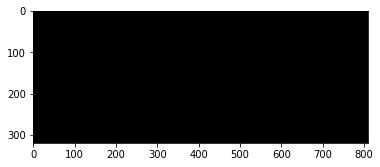

In [53]:
plt.imshow(xyz1[1],cmap='gray')
plt.show()

In [31]:
# Writing file
#cv2.imwrite("C:\MLAI\image.jpg",ld)

True